<a href="https://colab.research.google.com/github/Cristiand056/practicas_IA/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acción 3: Aplicación K-Means
* Con la base de entrenamiento, aplicar un modelo K-Means de aprendizaje automático
que pueda aprender del número de trabajadores de cada equipo y el tiempo extra
en minutos, para predecir “nivel_productividad”.
* Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy)
sobre los datos de prueba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score
from sklearn.metrics import classification_report

In [ ]:
#importar los datos
datos=pd.read_csv('/content/drive/MyDrive/IA_Data/anexo.csv')
datos.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
!pip install alibi-detect

In [ ]:
from alibi_detect.od import IForest
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
od = IForest(threshold=0., n_estimators=400)
od.fit(datos[['no_of_workers','over_time','actual_productivity']])
preds = od.predict(datos[['no_of_workers','over_time','actual_productivity']], return_instance_score=True)
datos['Valores_atípicos'] = preds['data']['is_outlier']
outliers = datos.loc[(datos['Valores_atípicos']==1)]#todas las filas
dataset = datos.loc[(datos['Valores_atípicos']==0)]#todas las columnas
dataset=dataset.drop(['Valores_atípicos'],axis=1)
datos = dataset[['no_of_workers','over_time','actual_productivity']]

nivel_productividad = []
for i in datos['actual_productivity']:
  if i > 0.7:
    nivel_productividad.append('alto')
  else:
    nivel_productividad.append('bajo')
datos['nivel_productividad'] = nivel_productividad


x=datos[['no_of_workers','over_time']]
y=datos['nivel_productividad'] = le.fit_transform(dataset['nivel_productividad'])

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)


<ipython-input-38-a91d069998ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Valores_atípicos'] = preds['data']['is_outlier']


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train, Y_train)
labels=kmeans.labels_
centroids = kmeans.cluster_centers_

pca=PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
centroids_reduced=pca.transform(centroids)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


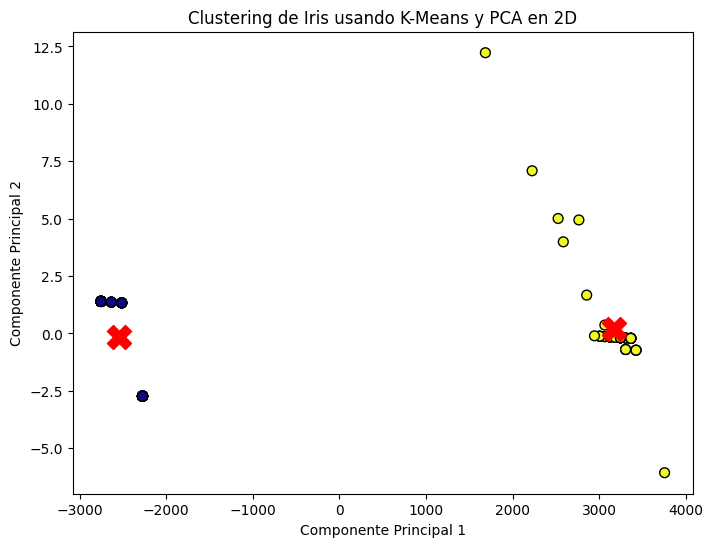

In [ ]:
#visualizar los resultados
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=labels,edgecolor='k', cmap='plasma',s=50)
plt.scatter(centroids_reduced[:,0],centroids_reduced[:,1],s=300,c='red',marker='X')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering de Iris usando K-Means y PCA en 2D')
plt.show()


In [ ]:
y_predicion = kmeans.predict(X_test, Y_test)
print(y_predicion)

[1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0
 1 1 1 1 0 1 0]


In [ ]:
score = accuracy_score(Y_test, y_predicion)
print(score)

0.4318181818181818


# Acción 4: Aplicación Arboles de decision
* Con la base de entrenamiento, aplicar un modelo de arboles de decision para distinguir "actual_productivity" bajo y alto usando las caracteristicas de "no_of_workers_" y "over_time"
* Visualizar el diagrama de arbol y analizar los nodos presentados
* Realizar las predicciones sobre la base de prueba calculando la precision

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score
import graphviz

In [ ]:
rinion = pd.read_csv('/content/drive/MyDrive/IA_Data/Chronic_Kidney_Dsease_data.csv')
rinion.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [ ]:
rinion.drop("DoctorInCharge", axis=1 ,inplace=True)
rinion.drop("PatientID", axis=1 ,inplace=True)
rinion.reset_index(drop=True, inplace=True)
columns = rinion.drop(rinion['Diagnosis'])
classes = rinion['Diagnosis']
print(columns)
rinion.head()

      Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel        BMI  \
2      80       1          1                    0               1  37.394822   
3      40       0          2                    0               1  31.329680   
4      43       0          1                    1               2  23.726311   
5      22       0          0                    0               1  39.155643   
6      41       0          1                    0               1  35.040487   
...   ...     ...        ...                  ...             ...        ...   
1654   90       0          0                    1               2  39.677059   
1655   34       0          0                    2               1  28.922015   
1656   84       0          0                    2               3  21.951219   
1657   90       0          0                    2               2  24.964149   
1658   34       1          1                    0               0  19.253258   

      Smoking  AlcoholConsumption  Phys

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


In [ ]:
x1 = rinion.iloc[:, :-1].values
y1 = rinion.iloc[:, -1].values
print(x1.shape)
print(y1.shape)

(1659, 51)
(1659,)


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dtc1 = DecisionTreeClassifier(criterion='entropy', random_state=10)
dtc1.fit(x_train1, y_train1)
dtc1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [ ]:
y_pred1 = dtc1.predict(x_test1)
print(y_pred1)

[1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, y_pred1)
print(cm)

[[  9  20]
 [ 13 290]]


In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test1, y_pred1)
print(cr)


              precision    recall  f1-score   support

           0       0.41      0.31      0.35        29
           1       0.94      0.96      0.95       303

    accuracy                           0.90       332
   macro avg       0.67      0.63      0.65       332
weighted avg       0.89      0.90      0.89       332



[Text(0.4480733082706767, 0.9615384615384616, 'SerumCreatinine <= 1.5\nentropy = 0.402\nsamples = 1327\nvalue = [106, 1221]'),
 Text(0.18609022556390978, 0.8846153846153846, 'GFR <= 60.402\nentropy = 0.754\nsamples = 300\nvalue = [65, 235]'),
 Text(0.07518796992481203, 0.8076923076923077, 'SleepQuality <= 4.838\nentropy = 0.264\nsamples = 134\nvalue = [6, 128]'),
 Text(0.045112781954887216, 0.7307692307692307, 'SleepQuality <= 4.748\nentropy = 0.874\nsamples = 17\nvalue = [5, 12]'),
 Text(0.03007518796992481, 0.6538461538461539, 'AlcoholConsumption <= 18.14\nentropy = 0.592\nsamples = 14\nvalue = [2, 12]'),
 Text(0.015037593984962405, 0.5769230769230769, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.045112781954887216, 0.5769230769230769, 'FastingBloodSugar <= 145.941\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.03007518796992481, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06015037593984962, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Te

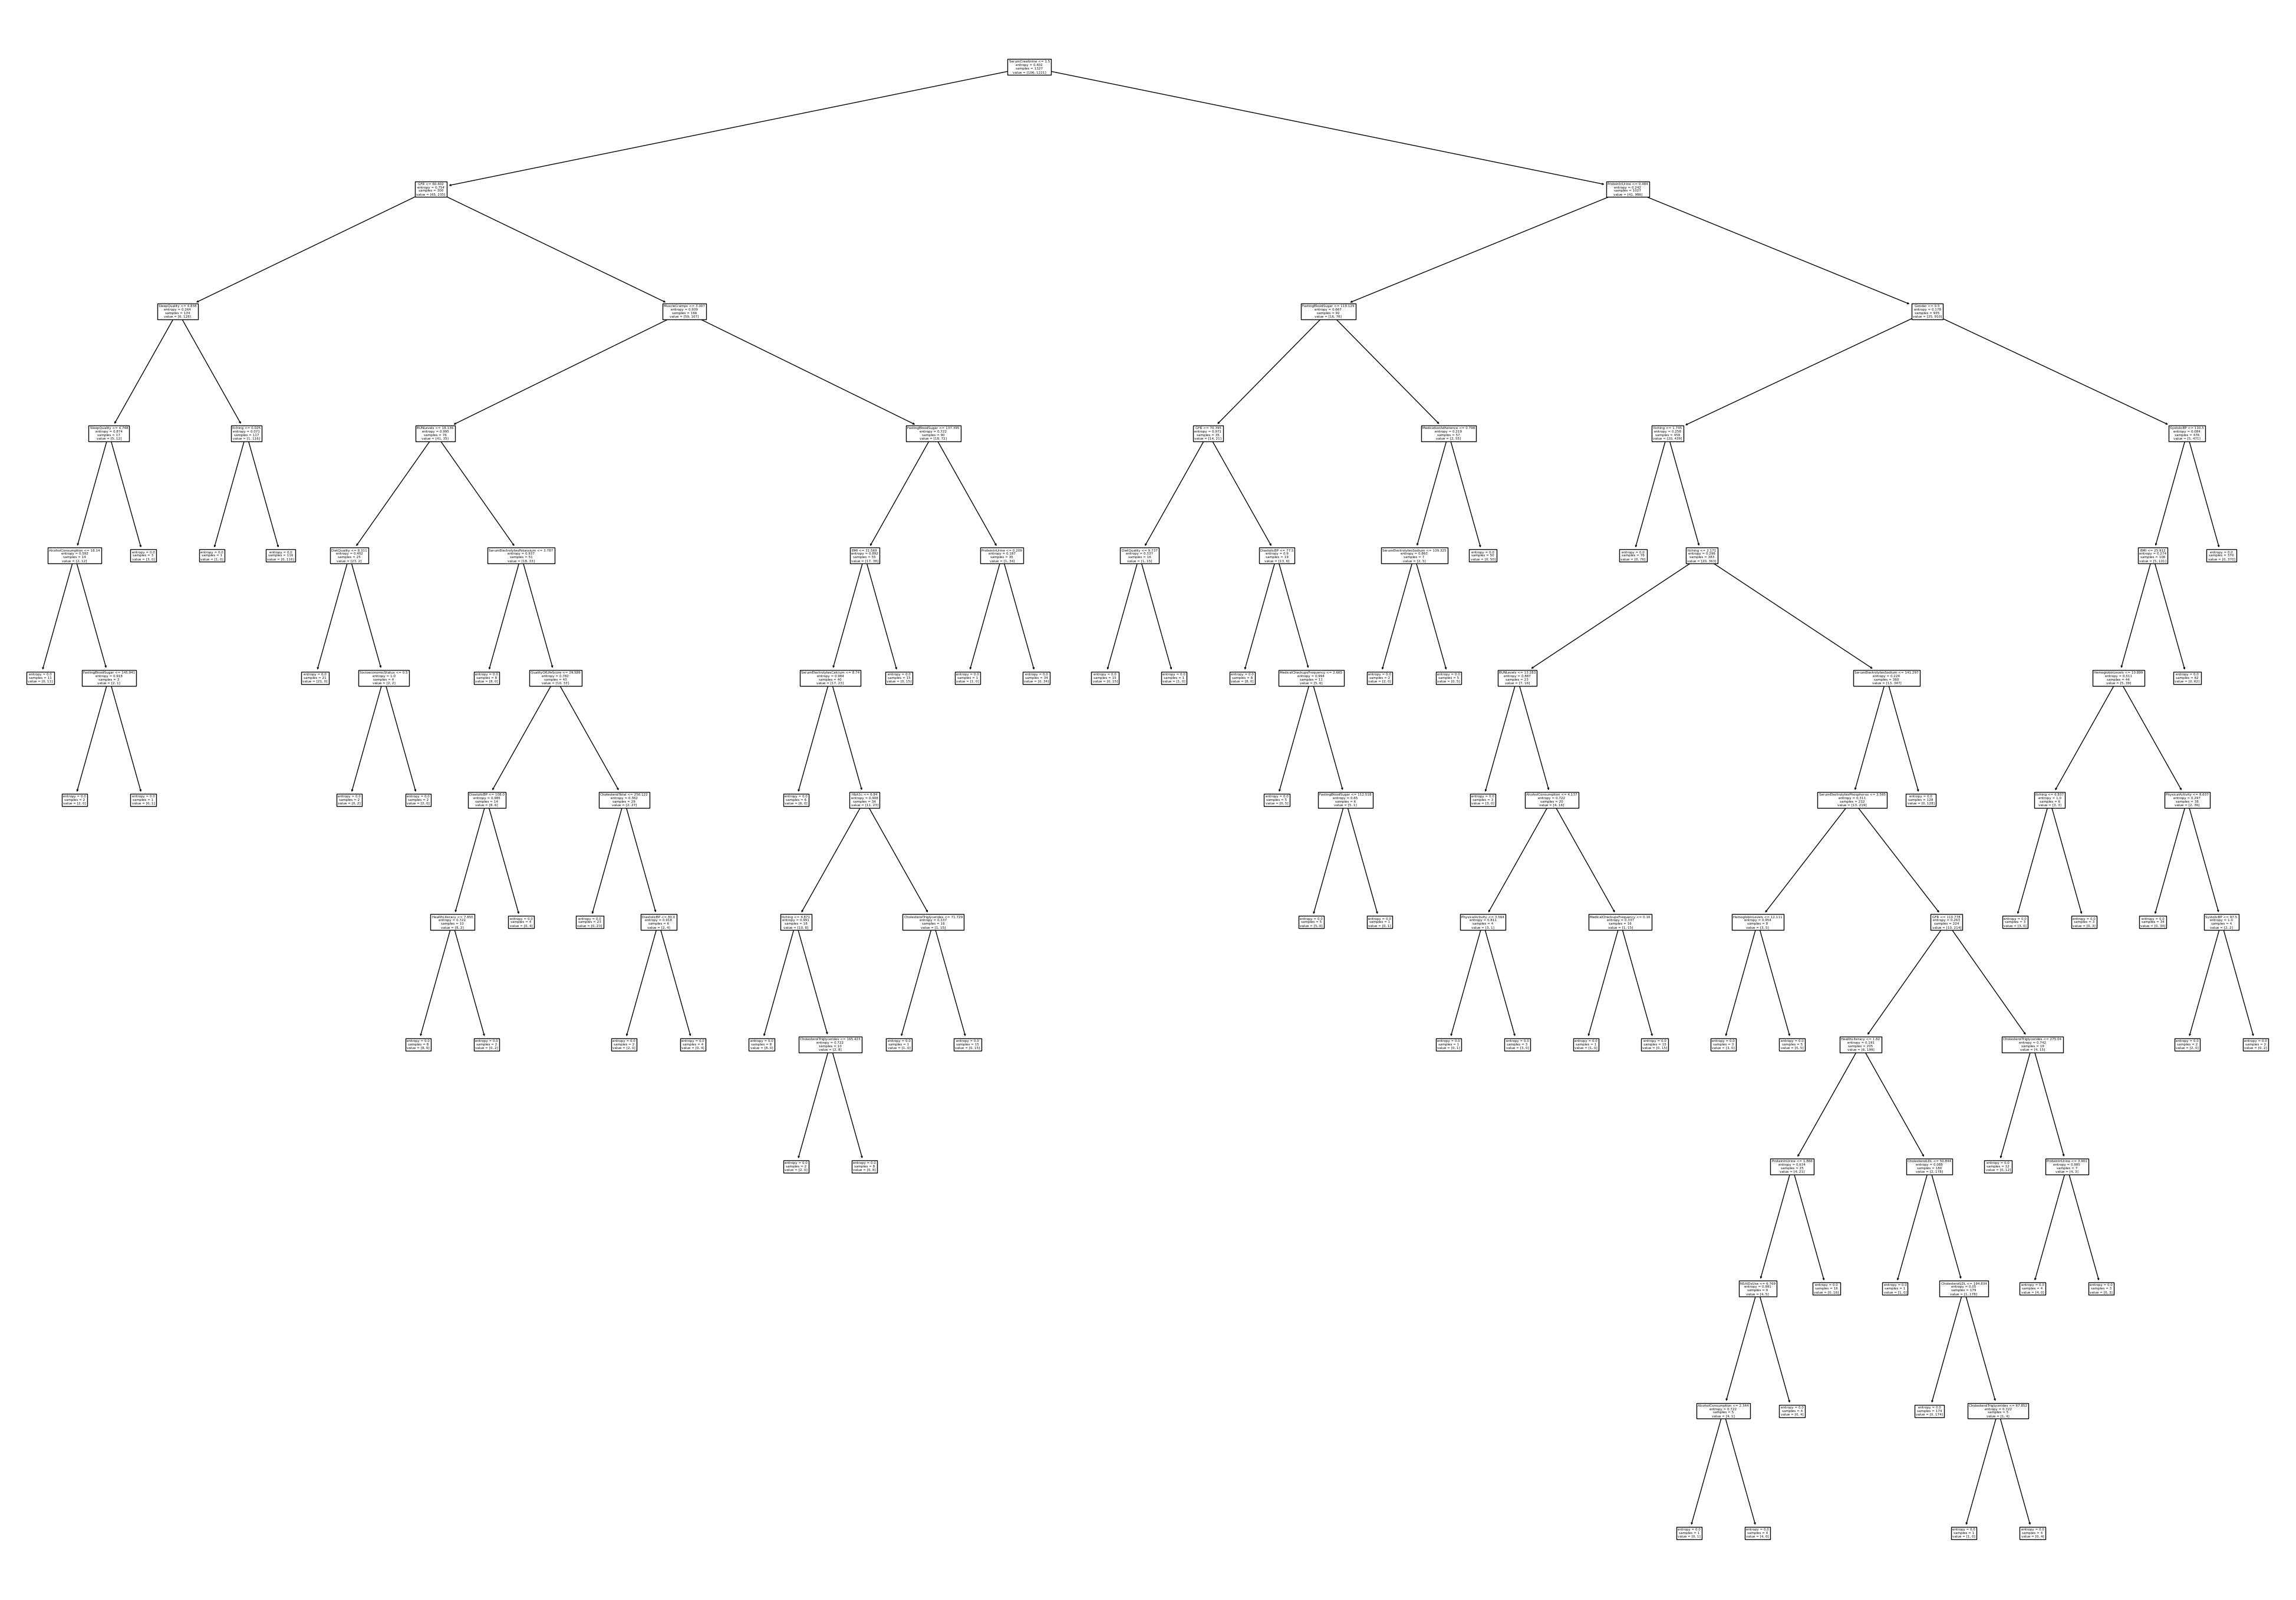

In [ ]:
from sklearn import tree

plt.figure(figsize=(50,35))
tree.plot_tree(dtc1, feature_names=columns.columns)

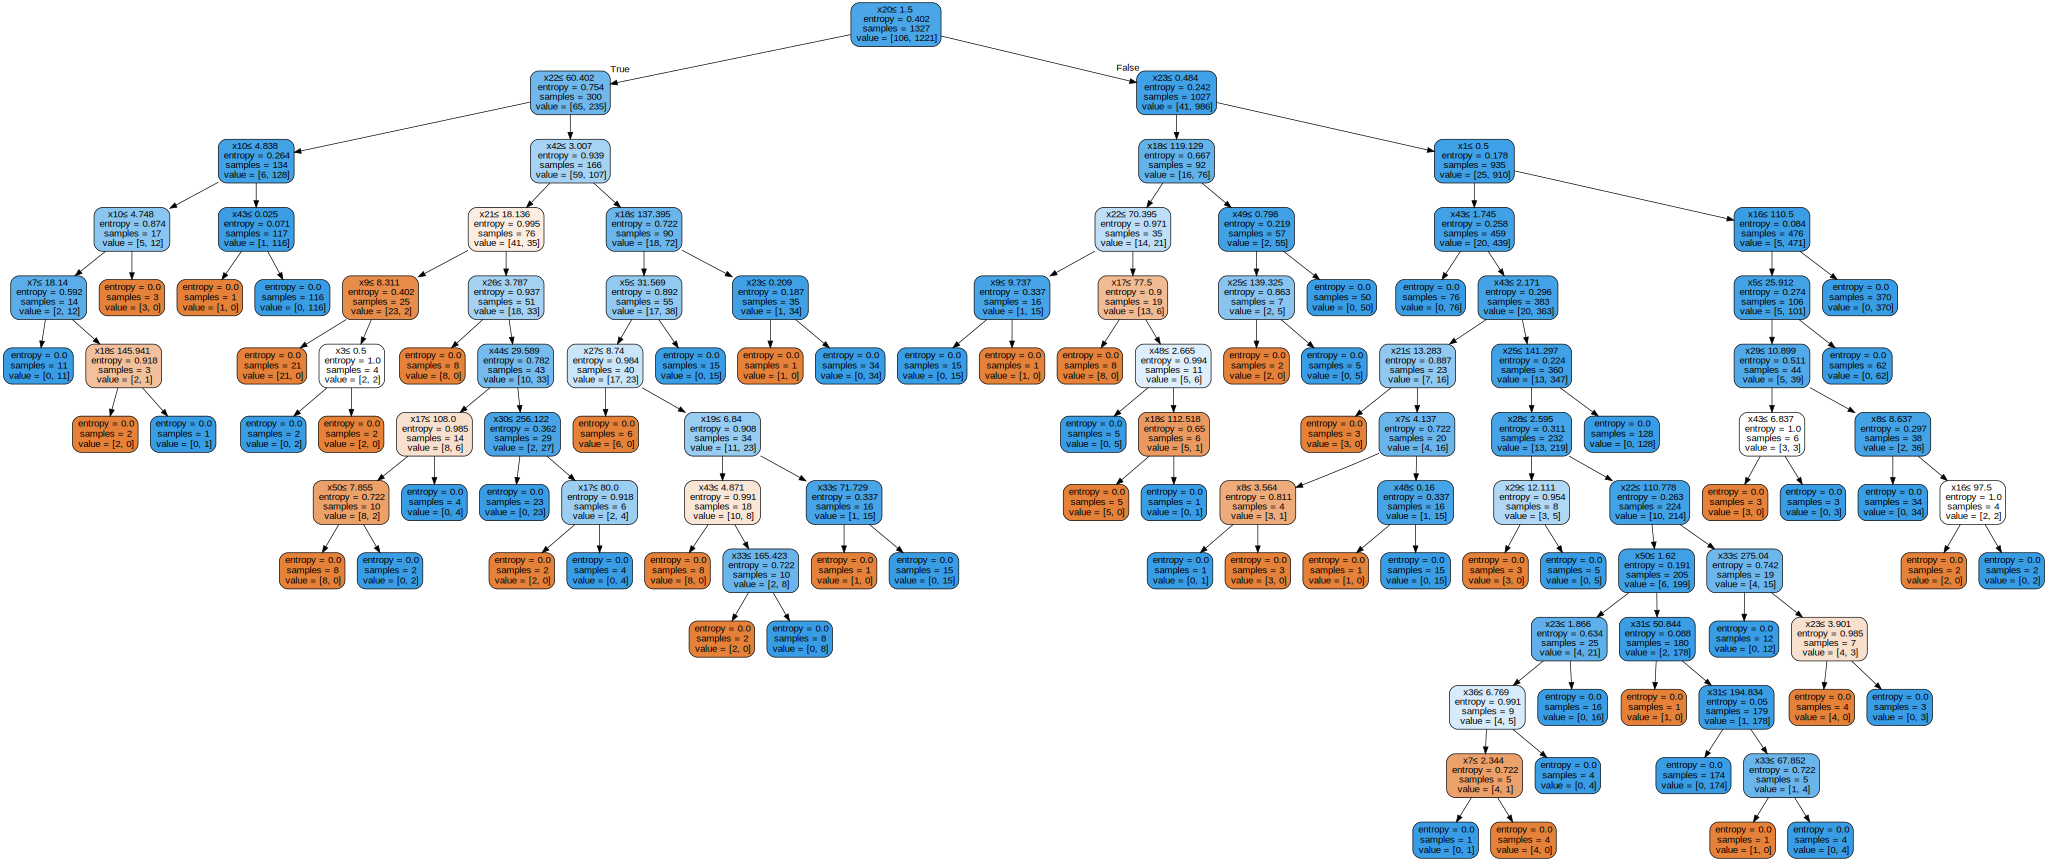

In [ ]:
dot_data=export_graphviz(dtc1, special_characters=True,filled=True, rounded=True)
graph=graphviz.Source(dot_data)
graph

In [ ]:
accurracy = accuracy_score(y_test1, y_pred1)
print(accurracy)

0.9006024096385542


#4to ahora sí


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini', random_state=10)
dtc.fit(x_train, y_train)
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
y_pred = dtc.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[99  0]
 [17  0]]


[Text(0.26046511627906976, 0.9666666666666667, 'x[0] <= 8.5\ngini = 0.31\nsamples = 464\nvalue = [375, 89]'),
 Text(0.11162790697674418, 0.9, 'x[1] <= 1200.0\ngini = 0.489\nsamples = 148\nvalue = [85, 63]'),
 Text(0.07441860465116279, 0.8333333333333334, 'gini = 0.499\nsamples = 79\nvalue = [41, 38]'),
 Text(0.14883720930232558, 0.8333333333333334, 'x[1] <= 1500.0\ngini = 0.462\nsamples = 69\nvalue = [44, 25]'),
 Text(0.07441860465116279, 0.7666666666666667, 'x[0] <= 7.5\ngini = 0.473\nsamples = 60\nvalue = [37, 23]'),
 Text(0.037209302325581395, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11162790697674418, 0.7, 'gini = 0.476\nsamples = 59\nvalue = [36, 23]'),
 Text(0.22325581395348837, 0.7666666666666667, 'x[1] <= 1740.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.18604651162790697, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26046511627906976, 0.7, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.40930232558139534, 0.9, 'x[1] <= 5790.0\ngini 

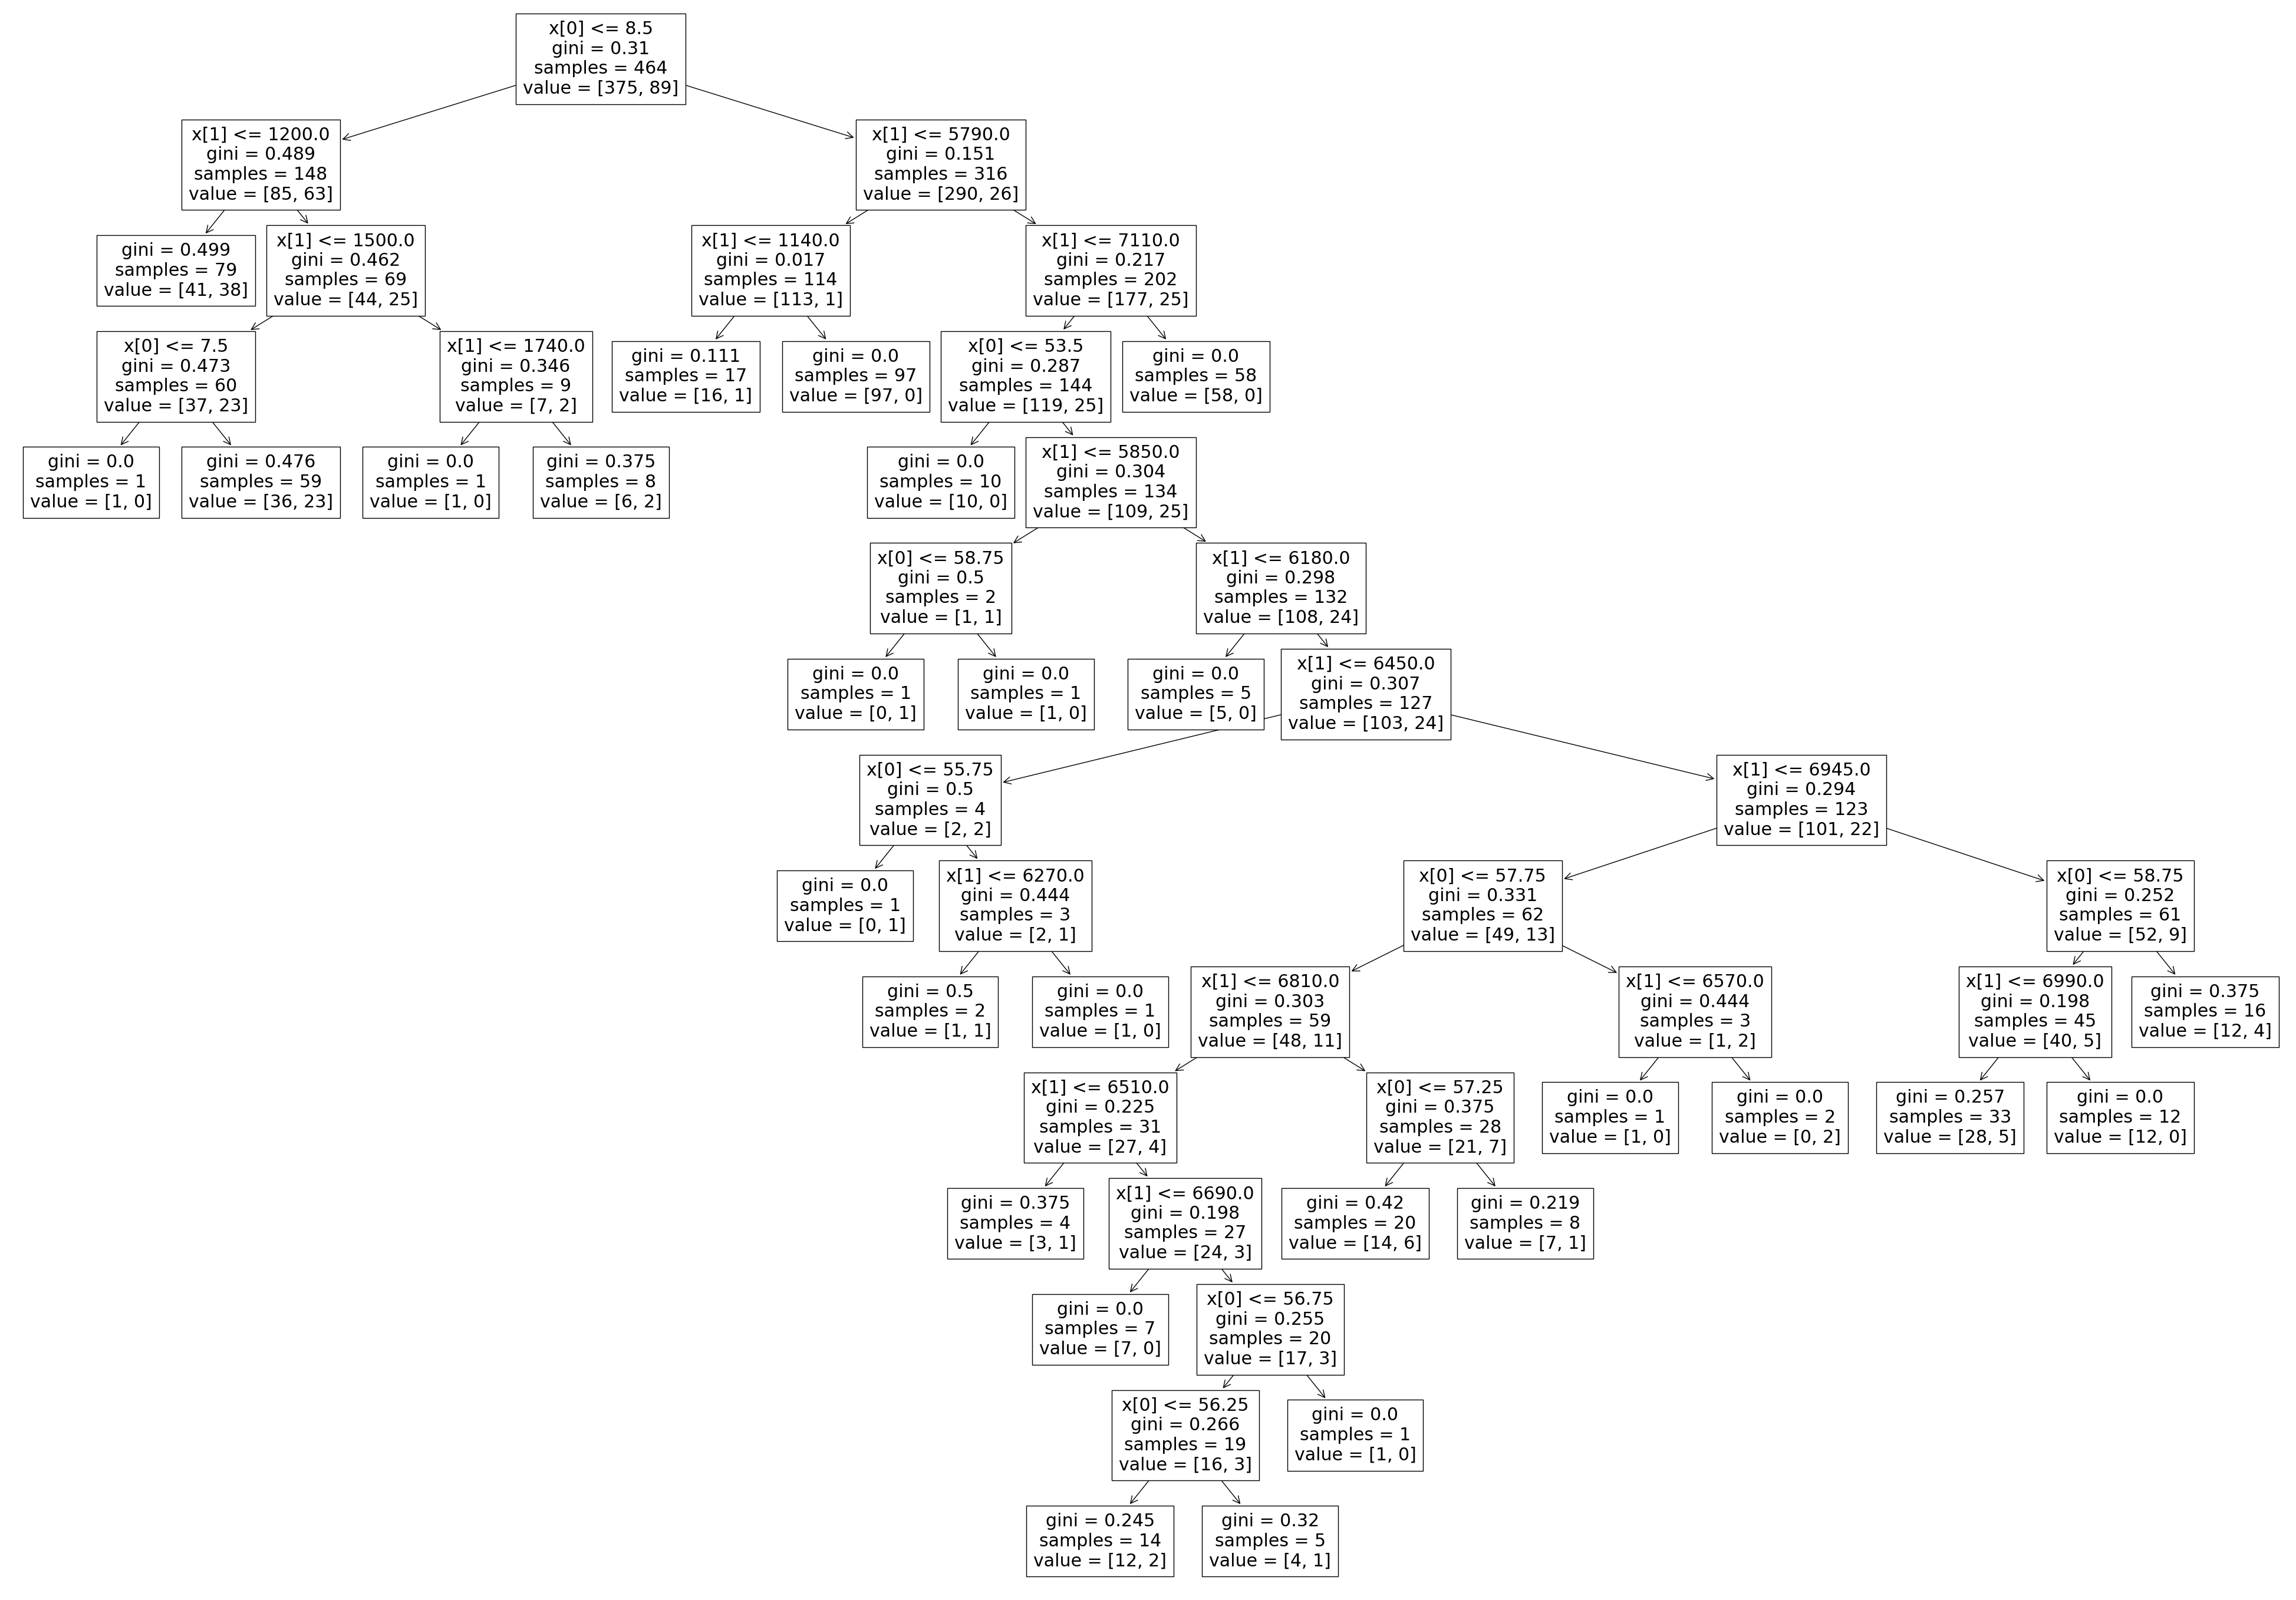

In [ ]:
from sklearn import tree

plt.figure(figsize=(50,35))
tree.plot_tree(dtc)

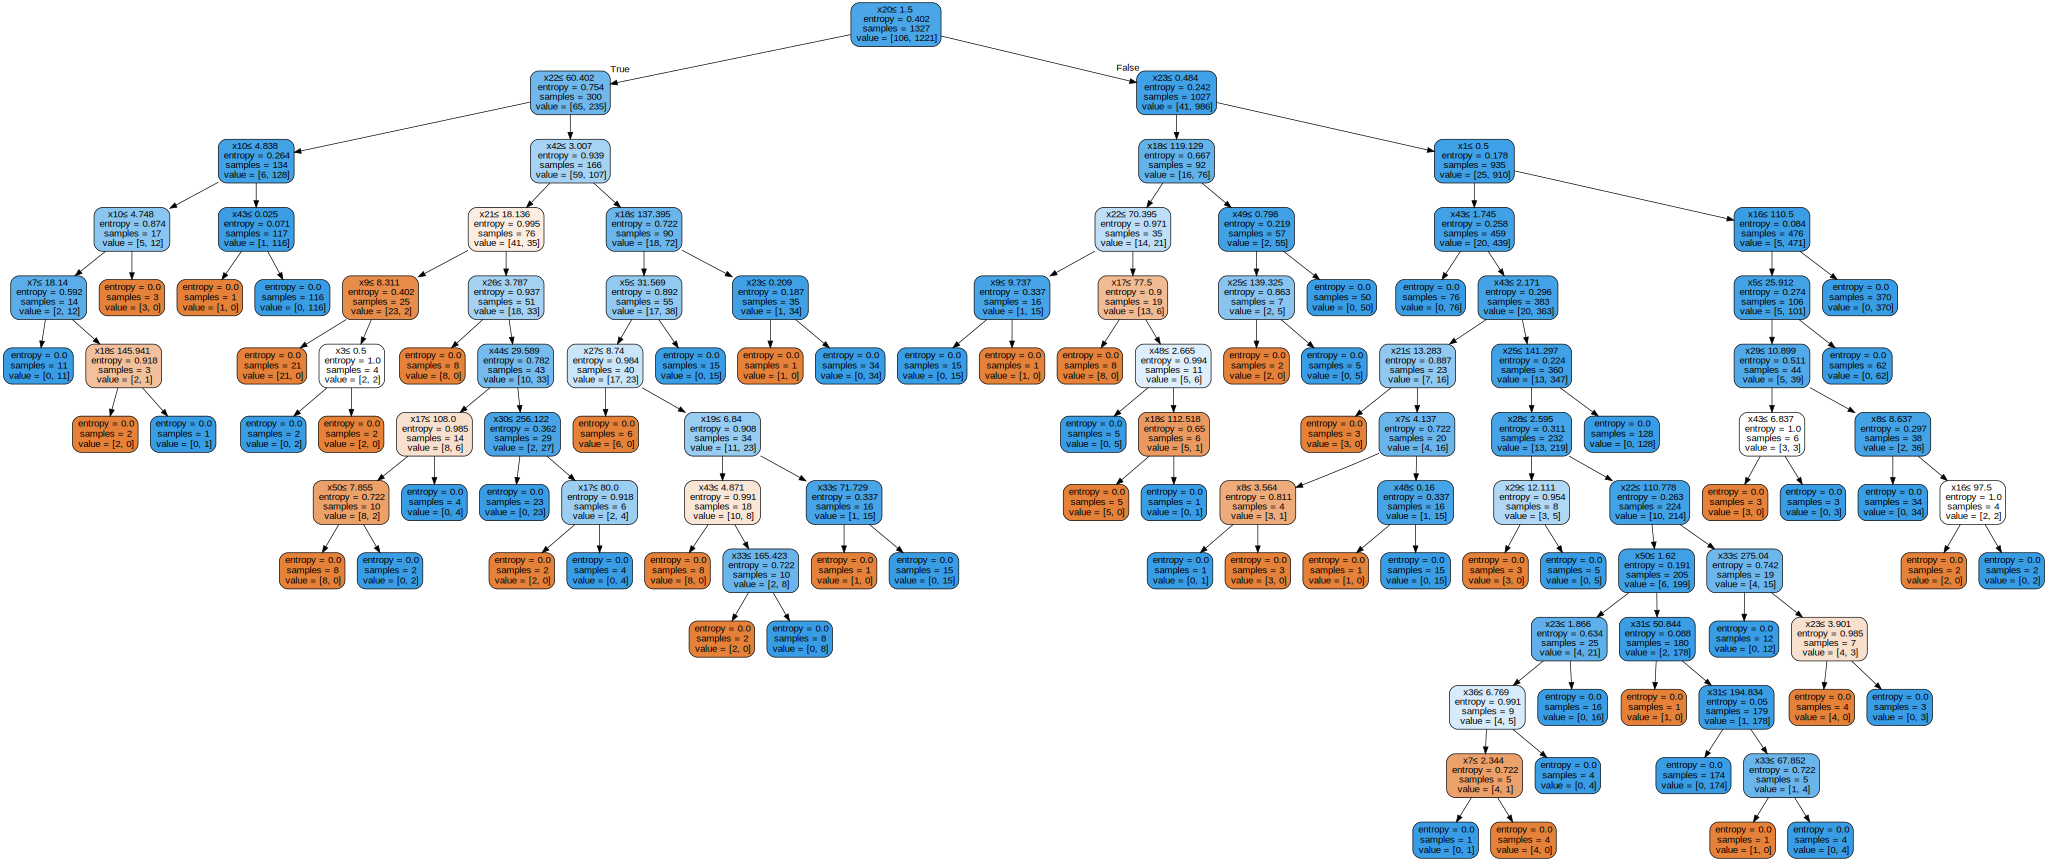

In [ ]:
dot_data=export_graphviz(dtc, special_characters=True,filled=True, rounded=True)
graph=graphviz.Source(dot_data)
graph

In [ ]:
accurracy = accuracy_score(y_test, y_pred)
print(accurracy)

0.853448275862069
